# Example code

This example shows how to load/visualize dataset, how to decide features & targets, how to prepare training data and how to choose a ML algorithm to train a prediction model with Scikit-Learn.


In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', 500)

# Data preparation


### 1. Features: pln_weather_2021
Load raw weather observation dataset and pack according to days

In [2]:
# Load csv file
weather_raw = pd.read_csv('2021_data/pln_weather_2021.csv', header=0)
# Set "record_time" as index and sort
weather_raw["record_time"] = pd.to_datetime(weather_raw["record_time"])
weather_raw = weather_raw.sort_values(by = 'record_time')
weather_raw = weather_raw.set_index("record_time") 
weather_raw

,id,atmospheric_pressure_quality,atmospheric_pressure_value,humidity_level_quality,humidity_level_value,nmt,rain_intensity_quality,rain_intensity_value,temperature_quality,temperature_value,wind_direction_quality,wind_direction_value,wind_speed_quality,wind_speed_value
record_time,,,,,,,,,,,,,,
2021-01-01 00:10:00,570148,100.0,1006.7,100.0,71.5,NMT5,100,0.0,100.0,8.3,100,295.2,100,3.0
2021-01-01 00:10:00,570040,100.0,1006.7,100.0,71.5,NMT5,100,0.0,100.0,8.3,100,295.2,100,3.0
2021-01-01 00:10:00,569115,100.0,1006.7,100.0,71.5,NMT5,100,0.0,100.0,8.3,100,295.2,100,3.0
2021-01-01 00:10:00,569721,100.0,1006.7,100.0,71.5,NMT5,100,0.0,100.0,8.3,100,295.2,100,3.0
2021-01-01 00:10:00,569259,100.0,1006.7,100.0,71.5,NMT5,100,0.0,100.0,8.3,100,295.2,100,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-14 05:50:00,906794,100.0,1012.8,100.0,91.2,NMT5,100,0.0,100.0,22.6,100,123.2,100,0.8
2021-09-14 05:50:00,906758,100.0,1012.8,100.0,91.2,NMT5,100,0.0,100.0,22.6,100,123.2,100,0.8
2021-09-14 05:50:00,906650,100.0,1012.8,100.0,91.2,NMT5,100,0.0,100.0,22.6,100,123.2,100,0.8


We are interested in certains features and will use them to predict air quality.

In [3]:
weather_features = ["atmospheric_pressure_value",
            "humidity_level_value",
            "rain_intensity_value",
            "temperature_value", 
            "wind_direction_value", 
            "wind_speed_value"]

In [4]:
# Keep interested features
weather_raw = weather_raw[weather_features]
weather_raw

,atmospheric_pressure_value,humidity_level_value,rain_intensity_value,temperature_value,wind_direction_value,wind_speed_value
record_time,,,,,,
2021-01-01 00:10:00,1006.7,71.5,0.0,8.3,295.2,3.0
2021-01-01 00:10:00,1006.7,71.5,0.0,8.3,295.2,3.0
2021-01-01 00:10:00,1006.7,71.5,0.0,8.3,295.2,3.0
2021-01-01 00:10:00,1006.7,71.5,0.0,8.3,295.2,3.0
2021-01-01 00:10:00,1006.7,71.5,0.0,8.3,295.2,3.0
...,...,...,...,...,...,...
2021-09-14 05:50:00,1012.8,91.2,0.0,22.6,123.2,0.8
2021-09-14 05:50:00,1012.8,91.2,0.0,22.6,123.2,0.8
2021-09-14 05:50:00,1012.8,91.2,0.0,22.6,123.2,0.8


#### Visualization
Plot temperature (all observations)

<AxesSubplot:xlabel='record_time'>

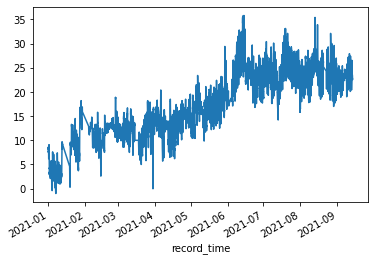

In [5]:
weather_raw["temperature_value"].plot()

Plot temperature (June 16 2021)

<AxesSubplot:xlabel='record_time'>

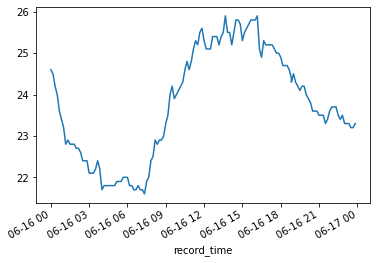

In [6]:
weather_raw.loc["2021-06-16"]["temperature_value"].plot()

### 2. Targets: air_quality_2021
Load raw air quality dataset, set record time as index and sort by record time

In [7]:
# Load csv file
air_raw = pd.read_csv('2021_data/water_quality_data_2021.csv', header=0)
# Distinguish samples from 2 air stations.
air_raw["record_time"] = pd.to_datetime(air_raw["record_time"])
air_raw = air_raw.sort_values(by = 'id_probe')
air_raw = air_raw.set_index("id_probe")

In [8]:
air_raw

,id,no2,pm_1,pm_10,pm_2_5,pressure,record_time,rh,so2,temp
id_probe,,,,,,,,,,
868,1275117,17.782,6.210,8.265,7.283,1006.86,2021-01-01 00:03:00,58.384,5.366,9.344
868,1642972,7.873,6.210,13.904,8.607,1022.52,2021-05-26 01:35:00,46.419,4.446,16.659
868,1642971,7.634,6.279,14.064,8.699,1022.52,2021-05-26 01:36:00,46.631,4.404,16.648
868,1642970,7.395,6.347,14.247,8.790,1022.51,2021-05-26 01:37:00,46.563,4.361,16.648
868,1642969,7.156,6.416,14.429,8.904,1022.51,2021-05-26 01:38:00,46.672,4.364,16.616
...,...,...,...,...,...,...,...,...,...,...
869,1411046,1.699,9.170,21.864,14.503,1021.68,2021-02-19 06:05:00,68.618,1.783,13.247
869,1682047,4.698,3.129,5.959,4.381,1019.70,2021-06-08 21:09:00,37.944,0.000,26.450
869,1682046,5.086,3.143,6.014,4.422,1019.67,2021-06-08 21:10:00,37.854,0.000,26.460


In [9]:
# Air position 1, sort by "record_time"
air_pos_1 = air_raw.loc[868]
air_pos_1 = air_pos_1.sort_values(by = 'record_time')
air_pos_1 = air_pos_1.set_index("record_time")

# Air position 2, sort by "record_time"
air_pos_2 = air_raw.loc[869]
air_pos_2 = air_pos_2.sort_values(by = 'record_time')
air_pos_2 = air_pos_2.set_index("record_time")

In [10]:
# Keep interested targets, in this example pm10.
air_features = ["pm_10", "pm_2_5"]
air_pos_1 = air_pos_1[air_features]
air_pos_2 = air_pos_2[air_features]

In [11]:
air_pos_1

,pm_10,pm_2_5
record_time,,
2021-01-01 00:01:00,8.425,7.466
2021-01-01 00:02:00,8.333,7.374
2021-01-01 00:03:00,8.265,7.283
2021-01-01 00:04:00,8.219,7.192
2021-01-01 00:05:00,8.174,7.078
...,...,...
2021-09-14 06:58:00,18.257,14.218
2021-09-14 06:59:00,18.333,14.292
2021-09-14 07:01:00,18.422,14.360


### Data prepare
In this example, we will train a Machine Learning models to predict average PM10 over 24 hours for day 2 and day 3.
Pack the dataset according to day: put together data with the same date, calculate daily mean value of each features.  

**Use pandas DataFrame.resample() method to resample dataset according to your need.**

[Resample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) the dataset by day, this operation will reduce the number of samples, you can choose other options like 'H'(1 hour) or '2H'(2 hours) to avoid loosing too much infomation.

In [12]:
air_pos_1_day = air_pos_1.resample('D').mean()
weather_day = weather_raw.resample('D').mean()
print(weather_day.values.shape)
print(air_pos_1_day.values.shape)

(257, 6)
(257, 2)


In [13]:
pm10_targets = air_pos_1_day.values[:,0]

In [14]:
days = weather_day.values.shape[0]
print("%d days"%days)

257 days


Use average value over 24 hours of weather features of day1 and day2 to predict average PM10 value over 24 hours of day 3 at position 1.

In [15]:
features = []
for day in range(days-2):
    feature_1 = weather_day.values[day,:]
    feature_2 = weather_day.values[day + 1, :]
    features.append(np.append(feature_1, feature_2))
features = np.array(features)

print(features.shape)

(255, 12)


In [16]:
targets = air_pos_1_day.values[2:,0]
print(targets.shape)

(255,)


Remove NaN values

In [17]:
# find indexes of NaN values in targets or features
def nan_index(targets, features):
    nan_targets = np.where(np.isnan(targets))[0]
    nan_features = []
    ind = 0
    for check in np.isnan(features):
        if True in check:
            nan_features.append(ind)
        ind += 1
    nan_features = np.array(nan_features)
    indexes = np.unique(np.append(nan_targets, nan_features))
    return indexes

In [18]:
indexes = nan_index(targets, features)
y = np.delete(targets, indexes)
X = np.delete(features, indexes, axis=0)

print("X shape: " + str(np.shape(X)))
print("y shape: " + str(np.shape(y)))

X shape: (228, 12)
y shape: (228,)


#### Split dataset to train and test sets.
Find more examples from Scikit-Learn [tutorial](https://scikit-learn.org/stable/supervised_learning.html) or other resources.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


Model: SVR (Support Vector Regression)

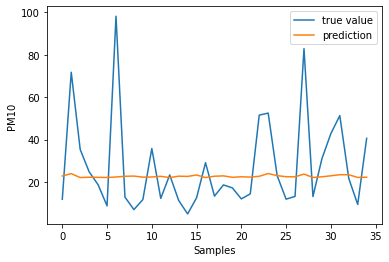

In [20]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_absolute_error(y_pred, y_test)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(('true value','prediction'))
plt.xlabel("Samples")
plt.ylabel("PM10")
plt.show()

Model: K Neighbors Regression

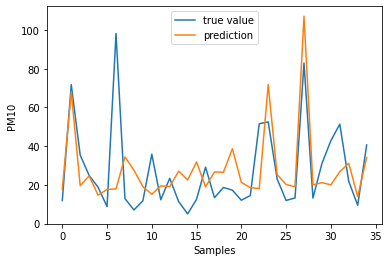

In [21]:
from sklearn.neighbors import KNeighborsRegressor

X_scaled = preprocessing.scale(X_train)
y_scaled = preprocessing.scale(y_train)
model = KNeighborsRegressor()
history = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(('true value','prediction'))
plt.xlabel("Samples")
plt.ylabel("PM10")
plt.show()

Model: Linear Regression

20.701497972410074


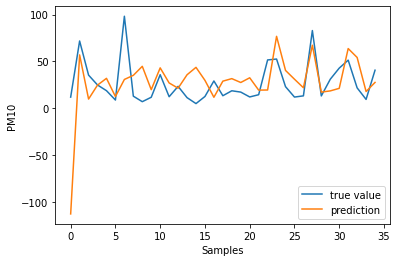

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)
y_pred = model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(('true value','prediction'))
plt.xlabel("Samples")
plt.ylabel("PM10")
plt.show()

Model: Random Forest Regressor

14.752553454765007


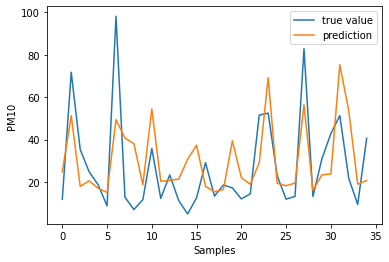

In [23]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)
y_pred = model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(('true value','prediction'))
plt.xlabel("Samples")
plt.ylabel("PM10")
plt.show()

Model: Multi layer perception regression (Neural Network)

In [24]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(
    hidden_layer_sizes=(6,2),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=5000, shuffle=True,
    random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(6, 2), max_iter=5000, random_state=1)

17.459442874924253


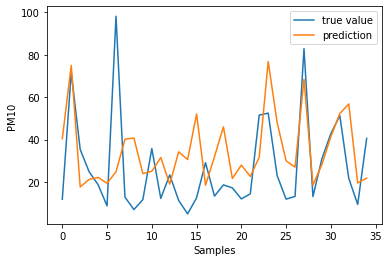

In [25]:
y_pred = model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(('true value','prediction'))
plt.xlabel("Samples")
plt.ylabel("PM10")

plt.show()

15.08049060176115


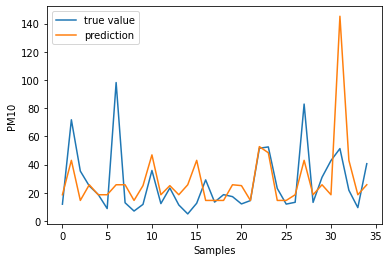

In [26]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(('true value','prediction'))
plt.xlabel("Samples")
plt.ylabel("PM10")

plt.show()

## Objective：
* Make the dataset according to your need and strategy.
* Decide your learning approach (direct or recursive, or maybe try both.)
* Try different 